In [1]:
# import necessary modules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from classy import Class
from math import pi
mpl.rcParams['font.size']=13.5

In [2]:
def setup_axis(ax, xlabel=None, ylabel=None, xscale=None, yscale=None, 
               fs=18, title=None):
    if xlabel: ax.set_xlabel(xlabel, fontsize=fs)
    if ylabel: ax.set_ylabel(ylabel, fontsize=fs)
    if xscale: ax.set_xscale(xscale)
    if yscale: ax.set_yscale(yscale)
    if title:  ax.set_title(title, fontsize=fs)
    return ax

In [10]:
# use input rotation field power spectrum
#
# "input_claa" is the file of the input rotation field power spectrum
#
# the input rotation power spectrum should be stored in one column from l=0
#
# "input_claa" and "A_cb" should not be given both.
#
params = {
        'output': 'tCl,pCl,rCl',
        'l_max_scalars': 4000,
        'rotation': 'yes',
        'alpha': 0,
        'input_claa': '../input_claa.txt'}

# params = {
#         'output': 'tCl,pCl,rCl',
#         'l_max_scalars': 4000,
#         'rotation': 'yes',
#         'alpha': 0,
#         'A_cb': 1e-5}

cosmo = Class()
cosmo.set(params)
cosmo.compute(level=['rotation'])
rot_cls = cosmo.rotated_cl()

In [11]:
test_params = {
        'output': 'tCl,pCl,rCl',
        'l_max_scalars': 4000,
        'rotation': 'yes',
        'perturb_rotation': 'yes',
        'alpha': 0,
        'input_claa': '../input_claa.txt'}

# test_params = {
#         'output': 'tCl,pCl,rCl',
#         'l_max_scalars': 4000,
#         'rotation': 'yes',
#         'perturb_rotation': 'yes',
#         'alpha': 0,
#         'A_cb': 1e-5}

cosmo = Class()
cosmo.set(test_params)
cosmo.compute(level=['rotation'])
test_rot_cls = cosmo.rotated_cl()

<AxesSubplot:xlabel='$\\ell$', ylabel='$D_{\\ell}^{BB}[\\mu K^2]$'>

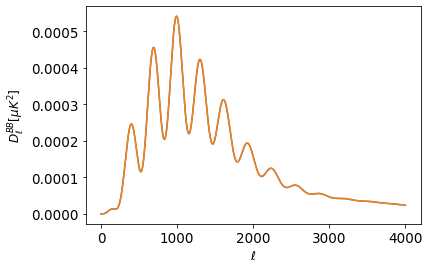

In [12]:
# plot the rotated BB power spectrum
#
ellmax = 4000
ells = np.arange(2, ellmax+1)
factor = ells*(ells+1)/(2*pi)
ells = np.arange(0, ellmax+1)
factor = ells*(ells+1)/(2*pi)
plt.plot(ells, 2.72e6**2*factor*rot_cls['bb'][ells], label='non-perturb')
plt.plot(ells, 2.72e6**2*factor*test_rot_cls['bb'][ells], label='perturb')
setup_axis(plt.gca(), xlabel=r'$\ell$', ylabel=r'$D_{\ell}^{BB}[\mu K^2]$',\
            fs=12)

<ipython-input-14-aa7ca2280433>:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ells, 1-test_rot_cls['bb'][ells]/rot_cls['bb'][ells], label='perturb')


<AxesSubplot:xlabel='$\\ell$', ylabel='$ratio$'>

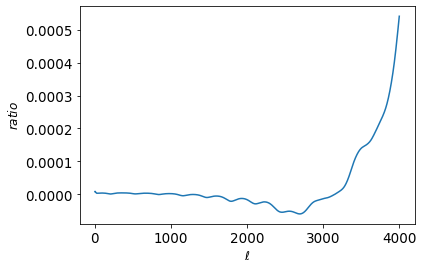

In [14]:
plt.plot(ells, 1-test_rot_cls['bb'][ells]/rot_cls['bb'][ells], label='perturb')
setup_axis(plt.gca(), xlabel=r'$\ell$', ylabel=r'$ratio$',\
            fs=12)